In [1]:
from pathlib import Path
from os.path import dirname,abspath
from sys import path,argv,stdout
#path.append(dirname(dirname(abspath(__file__))))
from cal.cal import ModelEvaluation
from cal.rs import resamplers_list
from cal.kal import skp
from itertools import product

In [2]:
from numpy import geomspace

In [3]:
print(resamplers_list)

['NearMiss', 'SMOTEENN', 'ADASYN', 'SMOTE', 'SMOTETomek', '']


In [4]:
#First try with fixed constants in front of "smoothed" FP and FN estimates, for label Generic
from numpy import ones
labs=['Generic']
params={
  #NN state initialisation params
  'nn':[dict(#sgd params
             lr_ad=1e-3,reg=1e-5,bias=0.,times=(128,),
             bs=128,eps=1e-8,beta1=.9,beta2=.999,
             #loss weight selection params
             adap_cutoff=False,
             lr_fp_fn=False,lrfpfn=False,fp_fn_weights=tuple(1. for _ in range(8)),
             #NN architecture and initialisation
             start_width=128,end_width=32,depth=4,act='relu',
             init='glorot_normal',layer_norm=False)],
  #sklearn params
        'sk':[]}#[dict(regressor=rg,**skp[rg],
        #           **({'max_depth':md} if rg=='RandomForestRegressor' else {}))\
        #      for md,rg in product([7,14],['RandomForestRegressor'])]}
#'SVC'])]}#'RandomForestRegressor',#'HistGradientBoostingRegressor',
                                        #'RandomForestClassifier','NuSVC'])]}
directory='jup_res'

m_resamplers=ModelEvaluation(ds='unsw',lab_cat=labs,params=params,fpfn_curve_n_points=1000,logf=stdout,
                             directory=directory,fixed_cutoff=True)
m_resamplers.set_targets()
m_resamplers.define_jobs(resamplers=['','SMOTE','SMOTETomek','SMOTEENN','ADASYN','NearMiss'])
m_resamplers.run_jobs()

6 jobs to perform:
nn  params: {'act': 'relu', 'adap_cutoff': False, 'beta1': 0.9, 'beta2': 0.999, 'bias': 0.0, 'bs': 128, 'depth': 4, 'end_width': 32, 'eps': 1e-08, 'fp_fn_weights': (1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0), 'init': 'glorot_normal', 'layer_norm': False, 'lr_ad': 0.001, 'lr_fp_fn': False, 'lrfpfn': False, 'reg': 1e-05, 'start_width': 128, 'times': (128,)}
nn SMOTETomek params: {'act': 'relu', 'adap_cutoff': False, 'beta1': 0.9, 'beta2': 0.999, 'bias': 0.0, 'bs': 128, 'depth': 4, 'end_width': 32, 'eps': 1e-08, 'fp_fn_weights': (1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0), 'init': 'glorot_normal', 'layer_norm': False, 'lr_ad': 0.001, 'lr_fp_fn': False, 'lrfpfn': False, 'reg': 1e-05, 'start_width': 128, 'times': (128,)}
nn SMOTE params: {'act': 'relu', 'adap_cutoff': False, 'beta1': 0.9, 'beta2': 0.999, 'bias': 0.0, 'bs': 128, 'depth': 4, 'end_width': 32, 'eps': 1e-08, 'fp_fn_weights': (1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0), 'init': 'glorot_normal', 'layer_norm': False, 'lr_

nn epoch 123
nn epoch 124
nn epoch 125
nn epoch 126
nn epoch 127
nn epoch 128
Saving state at time 128
...completed training for label Generic ...
Updating results...
Removing job...
3 experiments completed with 3 to go...
Initialising model...
method: nn
resampling: NearMiss
Parameters:
act relu
adap_cutoff False
beta1 0.9
beta2 0.999
bias 0.0
bs 128
depth 4
end_width 32
eps 1e-08
fp_fn_weights (1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0)
init glorot_normal
layer_norm False
lr_ad 0.001
lr_fp_fn False
lrfpfn False
reg 1e-05
start_width 128
times (128,)
Benchmarking...
Training for label Generic ...
nn epoch 1
nn epoch 2
nn epoch 3
nn epoch 4
nn epoch 5
nn epoch 6
nn epoch 7
nn epoch 8
nn epoch 9
nn epoch 10
nn epoch 11
nn epoch 12
nn epoch 13
nn epoch 14
nn epoch 15
nn epoch 16
nn epoch 17
nn epoch 18
nn epoch 19
nn epoch 20
nn epoch 21
nn epoch 22
nn epoch 23
nn epoch 24
nn epoch 25
nn epoch 26
nn epoch 27
nn epoch 28
nn epoch 29
nn epoch 30
nn epoch 31
nn epoch 32
nn epoch 33
nn epoch 34

PosixPath('jup_res/2025-05-13_08:38:46.520416')

In [41]:
#Experiment 2 - vary weighting of fp fn payoff butconstant over a single fit call
betas=geomspace(1.,10.,8)
params={'nn':[dict(lr_ad=1e-3,reg=1e-5,lrfpfn=0.,bias=0.,times=(128,),#8,16,32,64,128,256),#(1,2,4,8,16,32,64,128),
                   start_width=128,end_width=32,depth=4,bs=128,act='relu',adap_cutoff=False,
                   init='glorot_normal',eps=1e-8,beta1=.9,beta2=.999,layer_norm=False,
                   fp_fn_weights=tuple(betas))],
        'sk':[]}#[dict(regressor=rg,**skp[rg],
        #           **({'max_depth':md} if rg=='RandomForestRegressor' else {}))\
        #      for md,rg in product([7,14],['RandomForestRegressor'])]}
#'SVC'])]}#'RandomForestRegressor',#'HistGradientBoostingRegressor',
                                        #'RandomForestClassifier','NuSVC'])]}
directory='jup_res'

m_varcost=ModelEvaluation(ds='unsw',lab_cat=True,params=params,fpfn_curve_n_points=1000,logf=stdout,directory=directory)
m_varcost.set_targets()
m_varcost.define_jobs(resamplers=[''])#,'SMOTE','SMOTETomek','SMOTEENN','ADASYN','NearMiss'])
m_varcost.run_jobs()

1 jobs to perform:
nn  params: {'act': 'relu', 'adap_cutoff': False, 'beta1': 0.9, 'beta2': 0.999, 'bias': 0.0, 'bs': 128, 'depth': 4, 'end_width': 32, 'eps': 1e-08, 'fp_fn_weights': (1.0, 1.3894954943731377, 1.93069772888325, 2.6826957952797255, 3.72759372031494, 5.17947467923121, 7.196856730011519, 10.0), 'init': 'glorot_normal', 'layer_norm': False, 'lr_ad': 0.001, 'lrfpfn': 0.0, 'reg': 1e-05, 'start_width': 128, 'times': (128,)}
Initialising model...
method: nn
resampling: none
Parameters:
act relu
adap_cutoff False
beta1 0.9
beta2 0.999
bias 0.0
bs 128
depth 4
end_width 32
eps 1e-08
fp_fn_weights (1.0, 1.3894954943731377, 1.93069772888325, 2.6826957952797255, 3.72759372031494, 5.17947467923121, 7.196856730011519, 10.0)
init glorot_normal
layer_norm False
lr_ad 0.001
lrfpfn 0.0
reg 1e-05
start_width 128
times (128,)
Benchmarking...
Training for label Analysis ...
nn epoch 1
nn epoch 2
nn epoch 3
nn epoch 4
nn epoch 5
nn epoch 6
nn epoch 7
nn epoch 8
nn epoch 9
nn epoch 10
nn epoch 

nn epoch 28
nn epoch 29
nn epoch 30
nn epoch 31
nn epoch 32
nn epoch 33
nn epoch 34
nn epoch 35
nn epoch 36
nn epoch 37
nn epoch 38
nn epoch 39
nn epoch 40
nn epoch 41
nn epoch 42
nn epoch 43
nn epoch 44
nn epoch 45
nn epoch 46
nn epoch 47
nn epoch 48
nn epoch 49
nn epoch 50
nn epoch 51
nn epoch 52
nn epoch 53
nn epoch 54
nn epoch 55
nn epoch 56
nn epoch 57
nn epoch 58
nn epoch 59
nn epoch 60
nn epoch 61
nn epoch 62
nn epoch 63
nn epoch 64
nn epoch 65
nn epoch 66
nn epoch 67
nn epoch 68
nn epoch 69
nn epoch 70
nn epoch 71
nn epoch 72
nn epoch 73
nn epoch 74
nn epoch 75
nn epoch 76
nn epoch 77
nn epoch 78
nn epoch 79
nn epoch 80
nn epoch 81
nn epoch 82
nn epoch 83
nn epoch 84
nn epoch 85
nn epoch 86
nn epoch 87
nn epoch 88
nn epoch 89
nn epoch 90
nn epoch 91
nn epoch 92
nn epoch 93
nn epoch 94
nn epoch 95
nn epoch 96
nn epoch 97
nn epoch 98
nn epoch 99
nn epoch 100
nn epoch 101
nn epoch 102
nn epoch 103
nn epoch 104
nn epoch 105
nn epoch 106
nn epoch 107
nn epoch 108
nn epoch 109
nn epo

nn epoch 127
nn epoch 128
Saving state at time 128
...completed training for label DoS ...
Finding points for the fp fn, stage: tst ...
Finding points for the fp fn, stage: trn ...
Training for label Worms ...
nn epoch 1
nn epoch 2
nn epoch 3
nn epoch 4
nn epoch 5
nn epoch 6
nn epoch 7
nn epoch 8
nn epoch 9
nn epoch 10
nn epoch 11
nn epoch 12
nn epoch 13
nn epoch 14
nn epoch 15
nn epoch 16
nn epoch 17
nn epoch 18
nn epoch 19
nn epoch 20
nn epoch 21
nn epoch 22
nn epoch 23
nn epoch 24
nn epoch 25
nn epoch 26
nn epoch 27
nn epoch 28
nn epoch 29
nn epoch 30
nn epoch 31
nn epoch 32
nn epoch 33
nn epoch 34
nn epoch 35
nn epoch 36
nn epoch 37
nn epoch 38
nn epoch 39
nn epoch 40
nn epoch 41
nn epoch 42
nn epoch 43
nn epoch 44
nn epoch 45
nn epoch 46
nn epoch 47
nn epoch 48
nn epoch 49
nn epoch 50
nn epoch 51
nn epoch 52
nn epoch 53
nn epoch 54
nn epoch 55
nn epoch 56
nn epoch 57
nn epoch 58
nn epoch 59
nn epoch 60
nn epoch 61
nn epoch 62
nn epoch 63
nn epoch 64
nn epoch 65
nn epoch 66
nn epoc

PosixPath('jup_res/2025-05-13_09:44:44.362168')

In [42]:
from matplotlib.pyplot import plot,title,show,legend,xlabel,ylabel,xscale,yscale

In [46]:
from pandas import read_csv
df_rs=read_csv(m_resamplers.res_dir/'res.csv')
df_vc=read_csv(m_varcost.res_dir/'res.csv').sort_values('fp_target')
df_vc

,method,time,fn_train,fp_train,p,resampler,params,lab_cat,fn_target,fp_target,fn_test,fp_test
72,nn,128,0.000693,0.002279,0.000693,NaN,"{'act': 'relu', 'adap_cutoff': False, 'beta1':...",Worms,0.000069,0.000069,0.000634,0.002639
73,nn,128,0.000693,0.001569,0.000693,NaN,"{'act': 'relu', 'adap_cutoff': False, 'beta1':...",Worms,0.000050,0.000096,0.000634,0.001889
74,nn,128,0.000693,0.002949,0.000693,NaN,"{'act': 'relu', 'adap_cutoff': False, 'beta1':...",Worms,0.000036,0.000134,0.000634,0.003493
75,nn,128,0.000693,0.005339,0.000693,NaN,"{'act': 'relu', 'adap_cutoff': False, 'beta1':...",Worms,0.000026,0.000186,0.000634,0.005847
76,nn,128,0.000693,0.009741,0.000693,NaN,"{'act': 'relu', 'adap_cutoff': False, 'beta1':...",Worms,0.000019,0.000258,0.000634,0.010401
...,...,...,...,...,...,...,...,...,...,...,...,...
63,nn,128,0.007917,0.816584,0.172361,NaN,"{'act': 'relu', 'adap_cutoff': False, 'beta1':...",Exploits,0.001724,0.172361,0.008616,0.815102
45,nn,128,0.021040,0.563644,0.360939,NaN,"{'act': 'relu', 'adap_cutoff': False, 'beta1':...",Normal,0.006969,0.186948,0.020944,0.560218
39,nn,128,0.005006,0.488964,0.228557,NaN,"{'act': 'relu', 'adap_cutoff': False, 'beta1':...",Generic,0.002286,0.228557,0.005692,0.488189
46,nn,128,0.009979,0.577438,0.360939,NaN,"{'act': 'relu', 'adap_cutoff': False, 'beta1':...",Normal,0.005015,0.259763,0.009728,0.574461


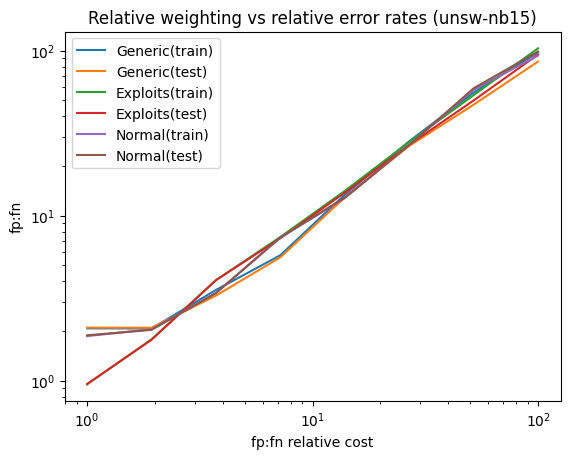

In [50]:

#plot(betas**.5,df_vc['fp_train'],label='fp train')
#plot(betas**.5,df_vc['fn_train'],label='fn train')
for lc in list(set(df_vc[df_vc['p']>.1]['lab_cat'])):
  df=df_vc[df_vc['lab_cat']==lc]
  #plot(betas**.5,(df['fp_train']/df['fn_train'])*(df['p']/(1-df['p'])),label=lc+'(train)')
  #plot(betas**.5,(df['fp_test']/df['fn_test'])*(df['p']/(1-df['p'])),label=lc+'(test)')
  plot(betas**2,(df['fp_train']/df['fn_train']),label=lc+'(train)')
  plot(betas**2,(df['fp_test']/df['fn_test']),label=lc+'(test)')
title('Relative weighting vs relative error rates (unsw-nb15)')
xlabel('fp:fn relative cost')
ylabel('fp:fn')#'*(p/(1-p))')
xscale('log')
yscale('log')
legend()
show()
#plot(betas**.5,df_vc['fp_test'],label='fp test')
#plot(betas**.5,df_vc['fn_test'],label='fn test')
#xlabel('fp:fn relative cost')
#legend()
#show()

In [53]:
df_vc[df_vc['p']>.1].sort_values(['p','fn_target'])

,method,time,fn_train,fp_train,p,resampler,params,lab_cat,fn_target,fp_target,fn_test,fp_test
63,nn,128,0.007917,0.816584,0.172361,NaN,"{'act': 'relu', 'adap_cutoff': False, 'beta1':...",Exploits,0.001724,0.172361,0.008616,0.815102
62,nn,128,0.015030,0.806843,0.172361,NaN,"{'act': 'relu', 'adap_cutoff': False, 'beta1':...",Exploits,0.002395,0.124046,0.016144,0.804429
61,nn,128,0.027687,0.773511,0.172361,NaN,"{'act': 'relu', 'adap_cutoff': False, 'beta1':...",Exploits,0.003328,0.089274,0.028680,0.770278
60,nn,128,0.046077,0.649866,0.172361,NaN,"{'act': 'relu', 'adap_cutoff': False, 'beta1':...",Exploits,0.004624,0.064249,0.047036,0.647836
59,nn,128,0.068065,0.504704,0.172361,NaN,"{'act': 'relu', 'adap_cutoff': False, 'beta1':...",Exploits,0.006425,0.046239,0.068769,0.501384
58,nn,128,0.096351,0.391016,0.172361,NaN,"{'act': 'relu', 'adap_cutoff': False, 'beta1':...",Exploits,0.008927,0.033278,0.096776,0.392978
57,nn,128,0.116704,0.207411,0.172361,NaN,"{'act': 'relu', 'adap_cutoff': False, 'beta1':...",Exploits,0.012405,0.023950,0.117630,0.207964
56,nn,128,0.140982,0.133830,0.172361,NaN,"{'act': 'relu', 'adap_cutoff': False, 'beta1':...",Exploits,0.017236,0.017236,0.141044,0.134524
39,nn,128,0.005006,0.488964,0.228557,NaN,"{'act': 'relu', 'adap_cutoff': False, 'beta1':...",Generic,0.002286,0.228557,0.005692,0.488189
38,nn,128,0.006670,0.371307,0.228557,NaN,"{'act': 'relu', 'adap_cutoff': False, 'beta1':...",Generic,0.003176,0.164489,0.007865,0.369395
